<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> State & Refine QS</h1></div>


##### What is the relation between the number of people at some seniority level with the company Type? 

> #### _`QS:`_
>|Set Expectation | Match Results| 
>|----|----|
>|<ul><li>Seniors will be the most frequent seniority level in all companies</li><li>Head and lead will be the least frequent seniority level in all companies</li><li>the number of juniors compared to seniors in the company will depend on company type (startups will contain more juniors)</li></ul>|_`Matches`_ |


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Explore Data</h1></div>

In [43]:
from utils import *
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from E_CompanyType_Seniority import *
from E_Salary_Cities import *

In [44]:

df_2020,df_2019,df_2018=read()
rename_columns(df_2020,df_2019,df_2018)
df_merged=merge([df_2020,df_2019,df_2018],common_columns=['Seniority level','Company type'])

In [45]:
######################################## Seniority Level Exploration #####################################

In [46]:
df_merged=df_merged.dropna(inplace=False)

In [47]:
df = clean_senior_col(df_merged)

#### 2- Exploring the data.

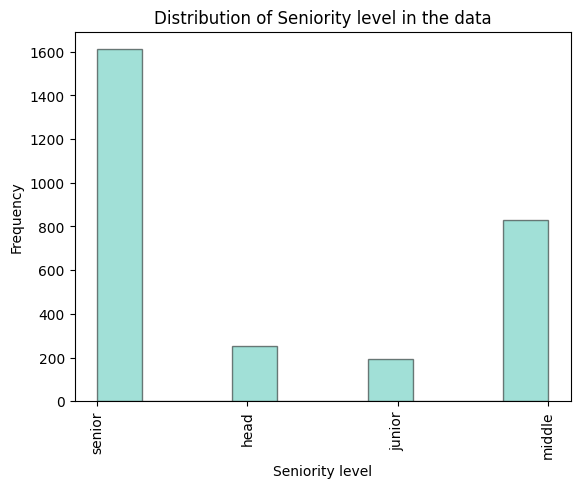

In [48]:
plt.hist(df['Seniority level'],color='#44c2b1', alpha=0.5,edgecolor='black')
plt.title(f"Distribution of Seniority level in the data")
plt.xlabel("Seniority level")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()


In [49]:
# clean Company type 
df = clean_company_types(df)
com_count = df['Company type'].value_counts()
com_list = com_count[com_count > 9].index.tolist()
df = df[df['Company type'].isin(com_list)]

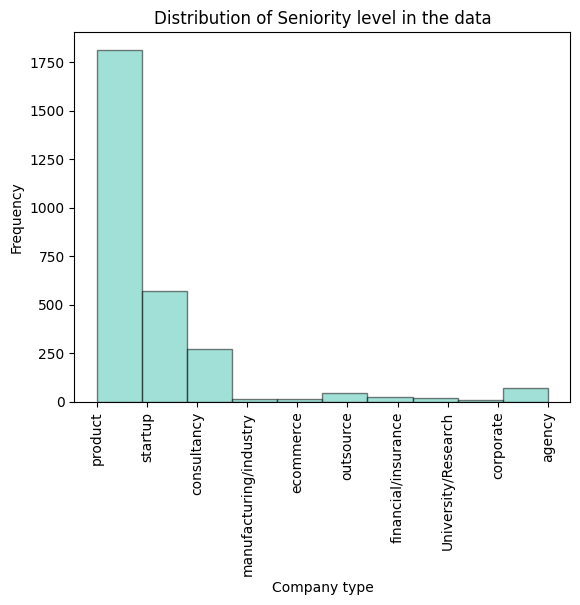

In [42]:
plt.hist(df['Company type'],color='#44c2b1', alpha=0.5,edgecolor='black')
plt.title(f"Distribution of Seniority level in the data")
plt.xlabel("Company type")
plt.xticks(rotation=90)
plt.ylabel("Frequency")
plt.show()

#### 3- Format Modeling to answer the question 

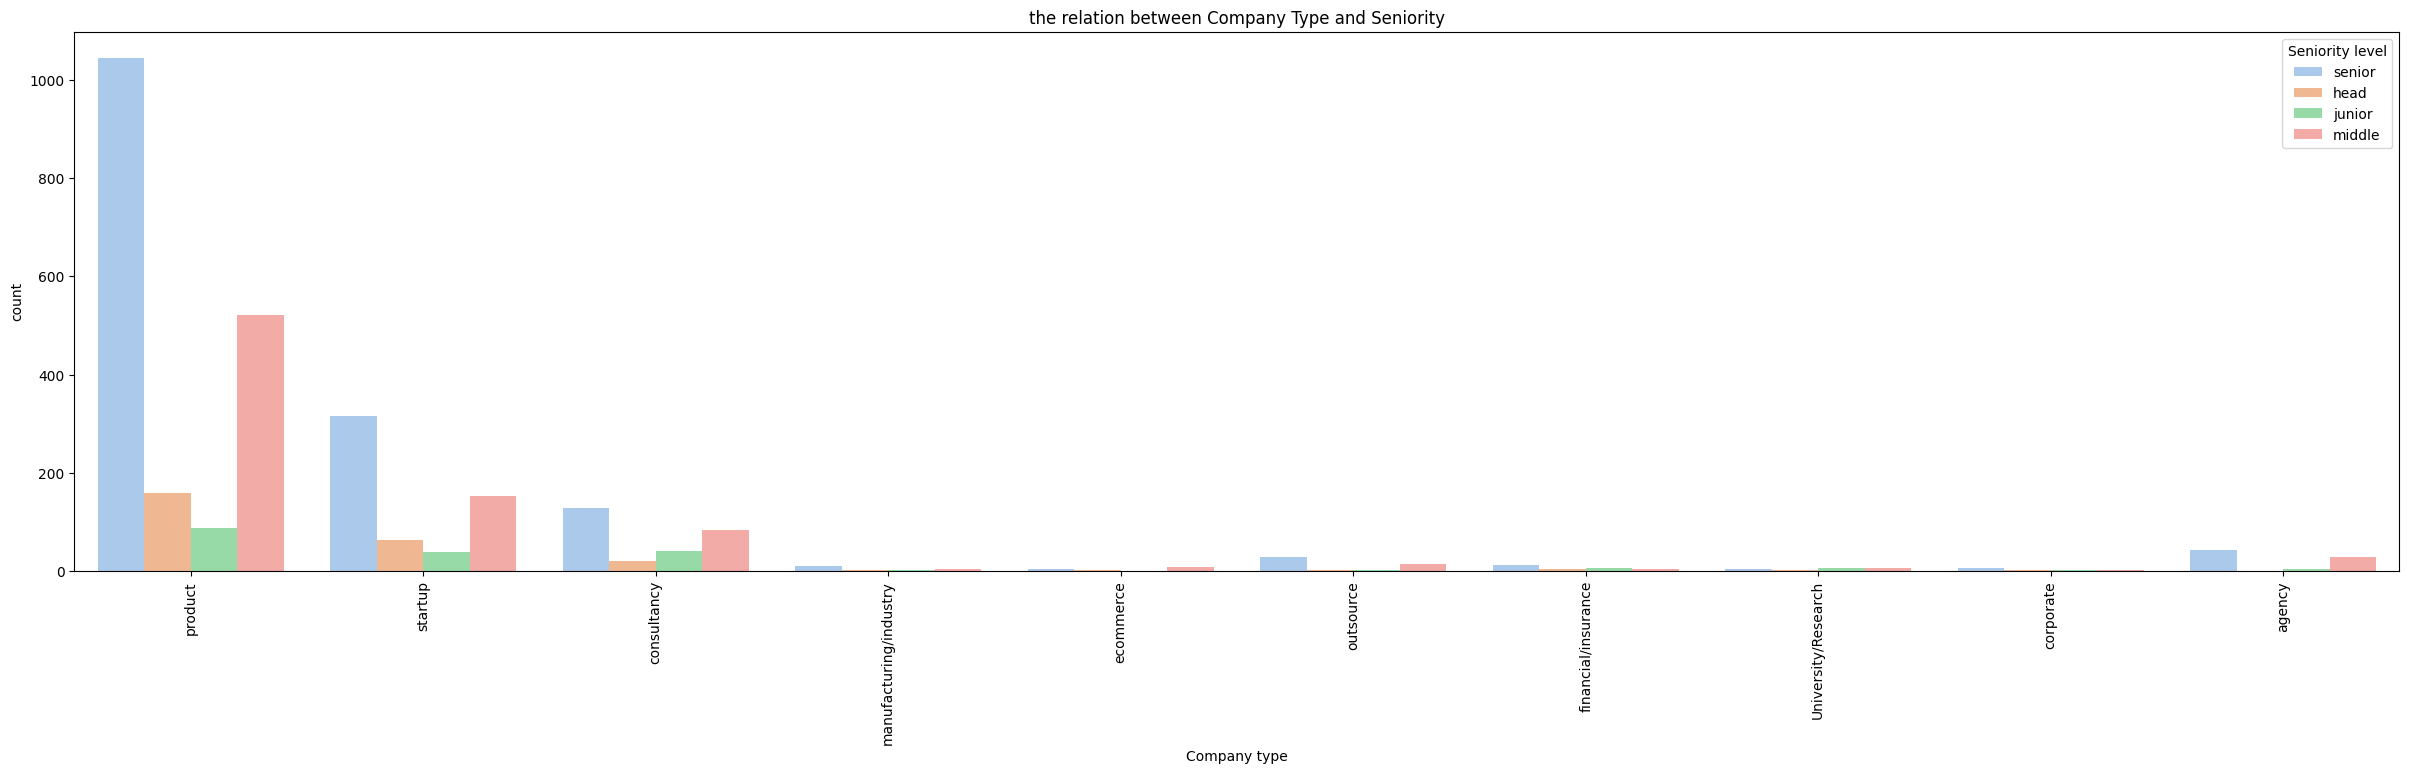

In [39]:
plt.figure(figsize=(30,7))
sns.countplot(x = 'Company type', data = df, hue = 'Seniority level', palette = 'pastel')
plt.title('the relation between Company Type and Seniority')
plt.xticks(rotation=90)
plt.show()

<Axes: xlabel='Company type', ylabel='Seniority level'>

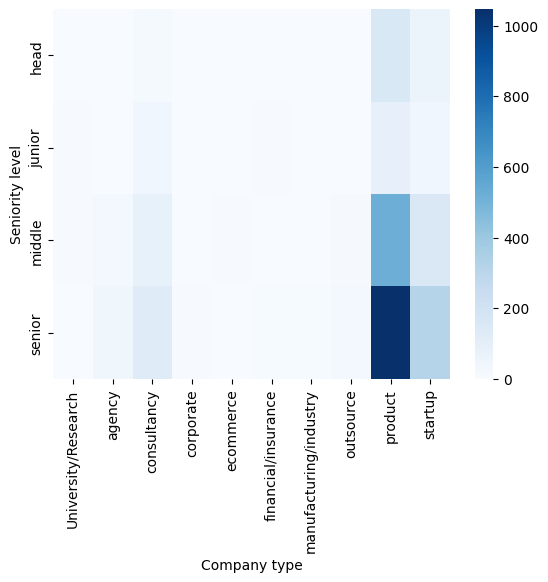

In [40]:
# calculate the conditional frequency of seniority level for each company type
freq_table = pd.crosstab(df['Seniority level'], df['Company type'])

# visualize the conditional frequency table using a heatmap
sns.heatmap(freq_table, cmap='Blues')

<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Build Models</h1></div>

In [41]:
from scipy.stats import chi2_contingency
# calculate the chi-squared statistic and p-value
_, p,_,_ = chi2_contingency(freq_table)
print('P-value:', p)

P-value: 5.069630716309754e-12


<div style="border-width:1; border-radius: 15px; border-style: solid; border-color: rgb(10, 10, 10); background-color: #316B83; text-align: center;font: 14pt 'Candara';font-weight:bold;"><h1> Interpret Results</h1></div>


1. it seems that seniority level is the most frequent level regardless of company type, However,the difference in the number of senior and junior employees is larger in product companies compared to startups, and for the kead and lead seniority level , they appeared little in all types as we expect 

2. This result may suggest that product companies may have a greater emphasis on hiring experienced and senior-level employees, potentially due to the need for specialized skills and expertise in product development. On the other hand, startups may be more willing to hire junior-level employees and provide them with opportunities for growth and advancement.

3. the lead and head level is less frequent in all types of companies. This may suggest that these higher-level positions are relatively rare and require significant experience and expertise to attain.

 

#### Results vs Expectation :
1. Matched 
2. Matched 
3. Matched 
